## Pytorch

Pytorch is an open source deep learning package originally from Facebook. Many deep learning practitioners prefer pytorch over tensorflow due to its simple and intuitive API. Below is an simple example on how to train a Convolutional Neural Network with Pytorch to classify MNIST handwritten digits. More tutorial examples can be found at [Getting started with Pytorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)  

In [39]:
import torch

#### Basic commands are similar to numpy to construct special matrices.   

In [40]:
x = torch.ones(2, 2)
print(x)

x = torch.zeros(3, 2)
print(x)

x = torch.rand(3, 4)
print(x)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.8402, 0.0657, 0.6886, 0.6152],
        [0.5475, 0.1748, 0.0435, 0.2967],
        [0.7369, 0.3601, 0.5560, 0.3009]])


#### Inpalce changes to a matrice can be done by _ at the end of command

In [41]:
a = torch.randn(1, 2)
print(a)

b = torch.randn(1, 2)
print(b)

a.add(b)
print("regular addition:", a)

a.add_(b)
print("inplace addition:", a)

tensor([[0.6317, 0.9971]])
tensor([[0.5142, 1.0722]])
regular addition: tensor([[0.6317, 0.9971]])
inplace addition: tensor([[1.1459, 2.0693]])


#### Download MNIST dataset 

In [44]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

#### Show example images

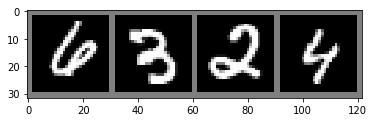

    6     3     2     4


In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Construct Convolutional Neural Network 

In [50]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()

#### Define Loss function and Optimizer 

In [51]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train Network

In [52]:
for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('Epoch %d batch %5d  loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Epoch 1 batch  2000  loss: 0.537
Epoch 1 batch  4000  loss: 0.132
Epoch 1 batch  6000  loss: 0.101
Epoch 1 batch  8000  loss: 0.095
Epoch 1 batch 10000  loss: 0.075
Epoch 1 batch 12000  loss: 0.064
Epoch 1 batch 14000  loss: 0.064
Epoch 2 batch  2000  loss: 0.047
Epoch 2 batch  4000  loss: 0.048
Epoch 2 batch  6000  loss: 0.043
Epoch 2 batch  8000  loss: 0.044
Epoch 2 batch 10000  loss: 0.041
Epoch 2 batch 12000  loss: 0.044
Epoch 2 batch 14000  loss: 0.041
Finished Training


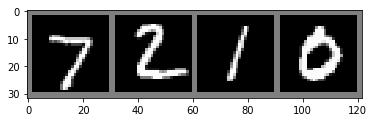

GroundTruth:      7     2     1     0


In [53]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
outputs = net(images)

In [33]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      7     2     1     0


In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 98.84 %


In [37]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2.2f %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99.39 %
Accuracy of     1 : 99.65 %
Accuracy of     2 : 97.87 %
Accuracy of     3 : 98.61 %
Accuracy of     4 : 99.90 %
Accuracy of     5 : 99.10 %
Accuracy of     6 : 98.64 %
Accuracy of     7 : 99.42 %
Accuracy of     8 : 98.56 %
Accuracy of     9 : 97.22 %
